In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

M:\Web Development\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [3]:
df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


#  1. Country with the most and least number of accidents

In [7]:
country_accident_counts = df['Countries'].value_counts()
most_accidents_country = country_accident_counts.idxmax(), country_accident_counts.max()
least_accidents_country = country_accident_counts.idxmin(), country_accident_counts.min()
print("Country with most accidents:", most_accidents_country)
print("Country with least accidents:", least_accidents_country)

Country with most accidents: ('Country_01', 251)
Country with least accidents: ('Country_03', 44)


# 2. Industrial sector with the most and least number of accidents

In [8]:
sector_accident_counts = df['Industry Sector'].value_counts()
most_accidents_sector = sector_accident_counts.idxmax(), sector_accident_counts.max()
least_accidents_sector = sector_accident_counts.idxmin(), sector_accident_counts.min()
print("Industrial sector with most accidents:", most_accidents_sector)
print("Industrial sector with least accidents:", least_accidents_sector)

Industrial sector with most accidents: ('Mining', 241)
Industrial sector with least accidents: ('Others', 50)


# 3. Determine who is more likely to get into an accident: employee or third party

In [10]:
party_accident_counts = df['Employee or Third Party'].value_counts()
most_likely_party = party_accident_counts.idxmax(), party_accident_counts.max()
print("Most likely to get into an accident:", most_likely_party)

Most likely to get into an accident: ('Third Party', 189)


# 4. Determine which gender is most likely to get into an accident

In [16]:
gender_accident_counts = df['Genre'].value_counts()
most_likely_gender = gender_accident_counts.idxmax(), gender_accident_counts.max()
print("Gender most likely to get into an accident:", most_likely_gender)

Gender most likely to get into an accident: ('Male', 403)


# 5. Perform visualizations

In [17]:
sns.set(style="whitegrid")

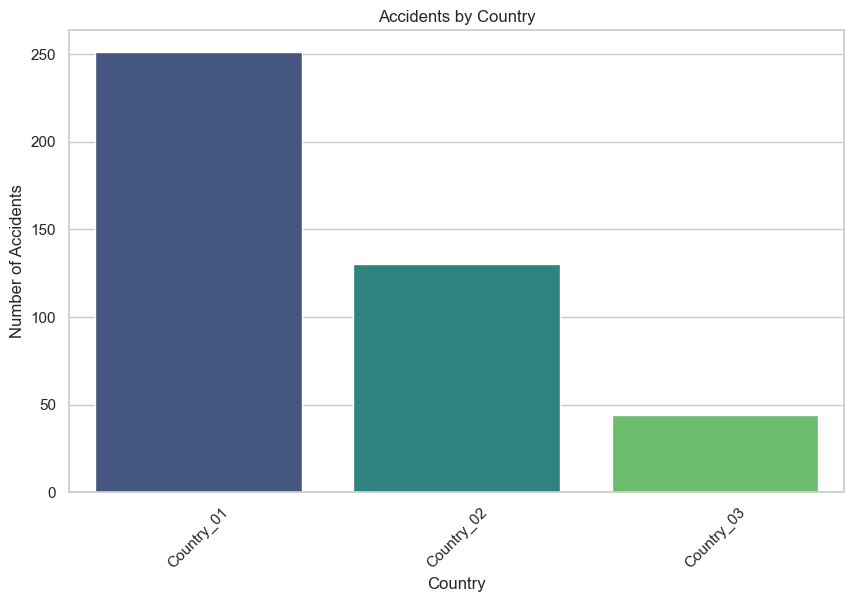

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=country_accident_counts.index, y=country_accident_counts.values, palette="viridis")
plt.title("Accidents by Country")
plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()


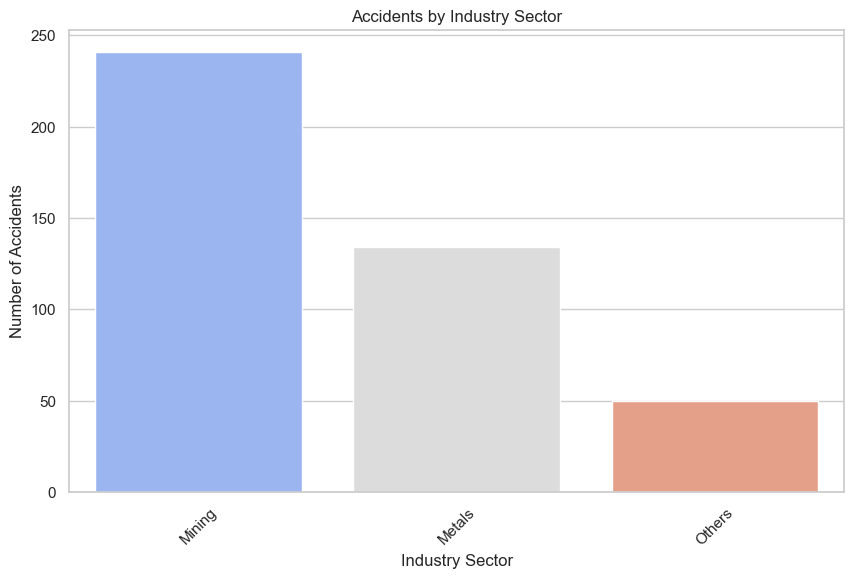

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_accident_counts.index, y=sector_accident_counts.values, palette="coolwarm")
plt.title("Accidents by Industry Sector")
plt.xlabel("Industry Sector")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

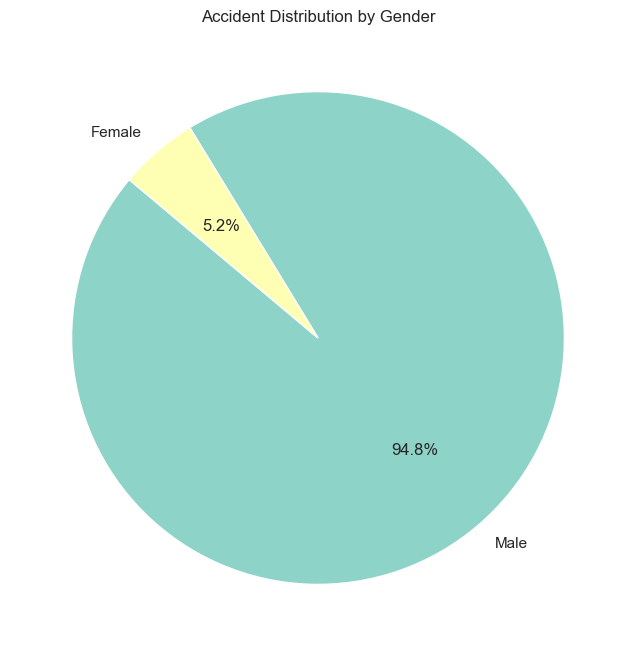

In [23]:
plt.figure(figsize=(8, 8))
gender_counts = df['Genre'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Accident Distribution by Gender")
plt.show()

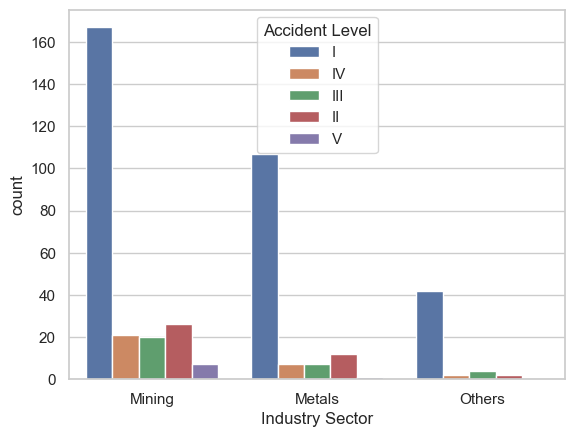

In [26]:
sns.countplot(x ='Industry Sector', hue = "Accident Level", data = df)
plt.show()

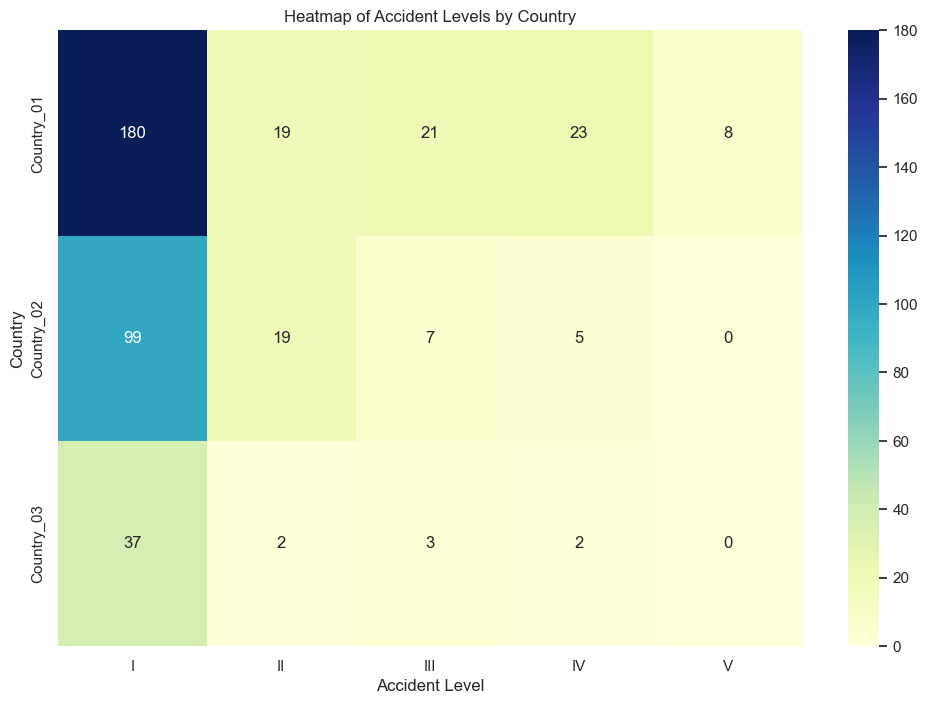

In [27]:
accident_level_country = df.pivot_table(index='Countries', columns='Accident Level', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(accident_level_country, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title("Heatmap of Accident Levels by Country")
plt.xlabel("Accident Level")
plt.ylabel("Country")
plt.show()